In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1.head()

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2.0,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1.0,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2.0,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1.0,20.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1.0,9.0,0.0,15.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.shape

(285332, 70)

In [ ]:
df1.size

19973240

In [ ]:
df1.describe()

,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,2.853320e+05,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,...,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000
mean,7.063002e+06,9.570765,0.026741,12.625323,0.124038,2.700075,0.200041,0.340356,0.377502,0.590244,...,6.245512,2.862462,0.672277,0.481631,0.255992,0.079383,0.060428,7.277414,1.045665,3.848236
std,3.772806e+09,8.515910,0.289672,6.191873,0.965362,3.270800,0.748732,1.679784,1.393303,2.168011,...,2.386162,0.370414,1.951045,1.663396,0.575932,0.534076,0.345463,7.506004,0.959294,3.491443
min,1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000
25%,1.000000e+00,9.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
50%,1.000000e+00,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2.000000e+00,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,2.015300e+12,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


In [ ]:
df1.isnull().sum()

accident_index                            2
vehicle_reference                         0
vehicle_type                              1
towing_and_articulation                   1
vehicle_manoeuvre                         1
                                      ...  
bus_or_coach_passenger                99260
pedestrian_road_maintenance_worker    99260
casualty_type                         99260
casualty_home_area_type               99260
casualty_imd_decile                   99260
Length: 70, dtype: int64

In [ ]:
df1.isnull().values.any()

True

In [ ]:
df=df1.loc[:,df1.columns!='accident_index']
df2=df.loc[:,df.columns!='local_authority_(highway)']
df3=df2.loc[:,df2.columns!='lsoa_of_accident_location']
df4=df3.loc[:,df3.columns!='date']
df5=df4.loc[:,df4.columns!='time']
df6=df5.fillna(0)

In [ ]:
Y_mnl=df6['accident_severity']#Response
X_mnl=df6.drop(['accident_severity'],1) #predictors

X_train_mnl ,X_test_mnl,y_train_mnl,y_test_mnl=train_test_split(X_mnl,Y_mnl,test_size=0.3,random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
print("Train data shape of x:",X_train_mnl.shape)
print("Test data shape of x:",X_test_mnl.shape)
print("Test data shape of y:",y_test_mnl.shape)
print("Train data shape of y:",y_train_mnl.shape)

Train data shape of x: (199732, 64)
Test data shape of x: (85600, 64)
Test data shape of y: (85600,)
Train data shape of y: (199732,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_RF = DecisionTreeClassifier(random_state=0)

In [ ]:
model_RF.fit(X_train_mnl, y_train_mnl)

DecisionTreeClassifier(random_state=0)

In [ ]:
print(f'Decision tree has {model_RF.tree_.node_count} nodes with maximum depth {model_RF.tree_.max_depth}.')

Decision tree has 27349 nodes with maximum depth 50.


In [ ]:
print(f'Model Accuracy: {model_RF.score(X_train_mnl, y_train_mnl)}')

Model Accuracy: 1.0


In [ ]:
from sklearn import metrics

In [ ]:
pred = model_RF.predict(X_test_mnl)

In [ ]:
print(metrics.accuracy_score(pred,y_test_mnl))

0.8991939252336448


In [ ]:
cm6 = metrics.confusion_matrix(pred,y_test_mnl)

In [ ]:
print(cm6)

[[    0     0     0     0]
 [    0   720   190   285]
 [    0   165  7980  4173]
 [    1   234  3581 68271]]


In [ ]:
dtree= DecisionTreeClassifier()
dtree.fit(X_train_mnl,y_train_mnl)
predictions= dtree.predict(X_test_mnl)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_mnl,predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.61      0.65      0.62      1119
         2.0       0.65      0.68      0.66     11751
         3.0       0.95      0.94      0.94     72729

    accuracy                           0.90     85600
   macro avg       0.55      0.57      0.56     85600
weighted avg       0.90      0.90      0.90     85600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


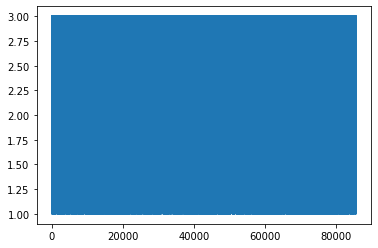

In [ ]:
plt.plot(predictions)